In [1]:
import pandas as pd
import numpy as np
import tqdm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.tsa.ar_model as ar
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

In [5]:
from google.colab import files
uploaded = files.upload()
import io
new_series = pd.read_csv(io.BytesIO(uploaded['weekly-closings-of-the-dowjones-.csv']))['Close']

Saving weekly-closings-of-the-dowjones-.csv to weekly-closings-of-the-dowjones-.csv


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


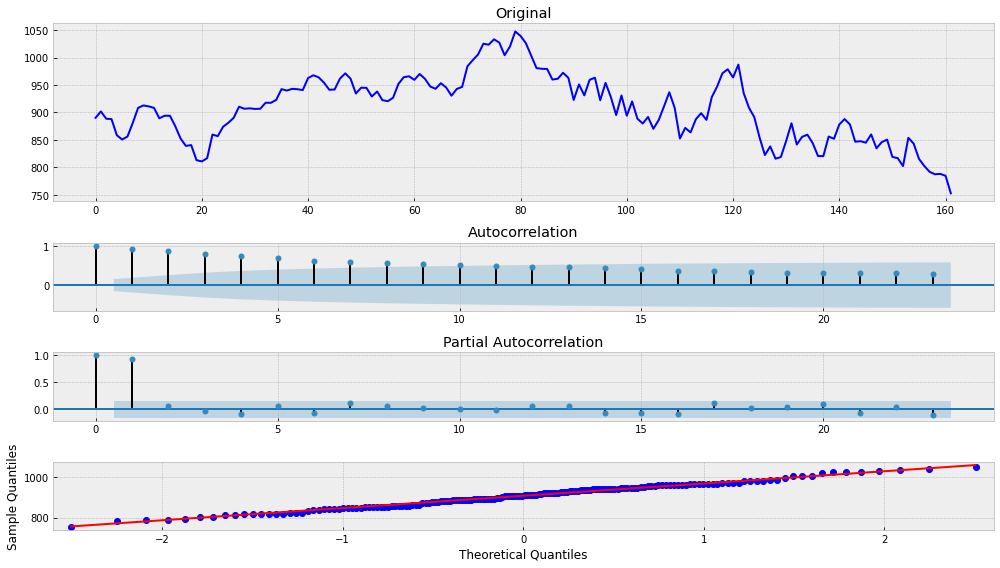

In [6]:
#new_series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
#new_series = boxcox(new_series, 0)
#new_series = new_series[1:] - new_series[:-1]
tsplot(new_series)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting auto

aic: 1416.32751 | order: (2, 2, 3)
Results of Dickey-Fuller Test:
Test Statistic                 -51.719726
p-value                          0.000000
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


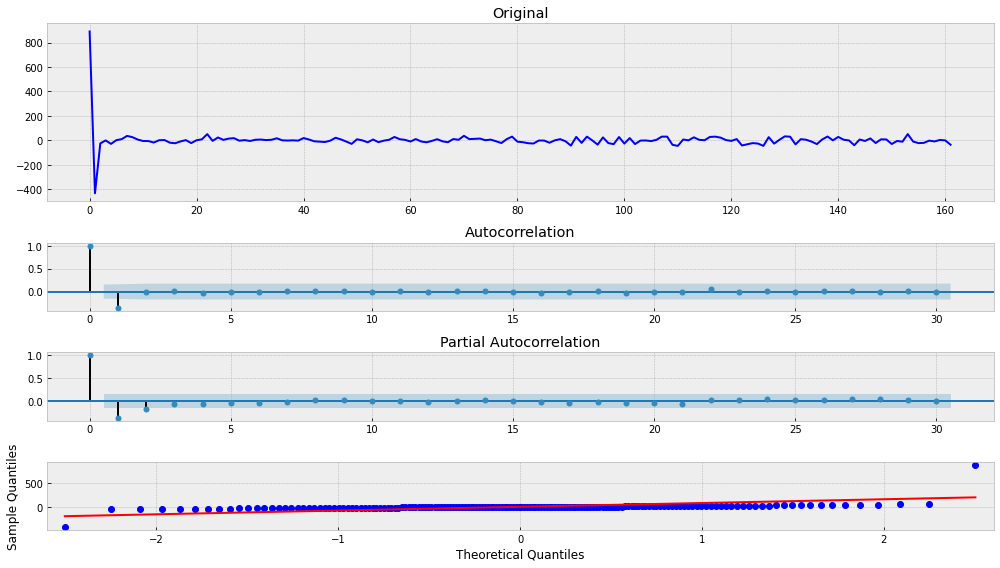

In [7]:
best_aic = np.inf 
best_order = None
best_mdl = None

for i in range(5):
    for d in range(5):
        for j in range(5):
            try:
                tmp_mdl = ARIMA(new_series, order=(i,d,j)).fit()
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

print(best_mdl)
tsplot(best_mdl.resid, lags=30)

In [8]:
best_mdl

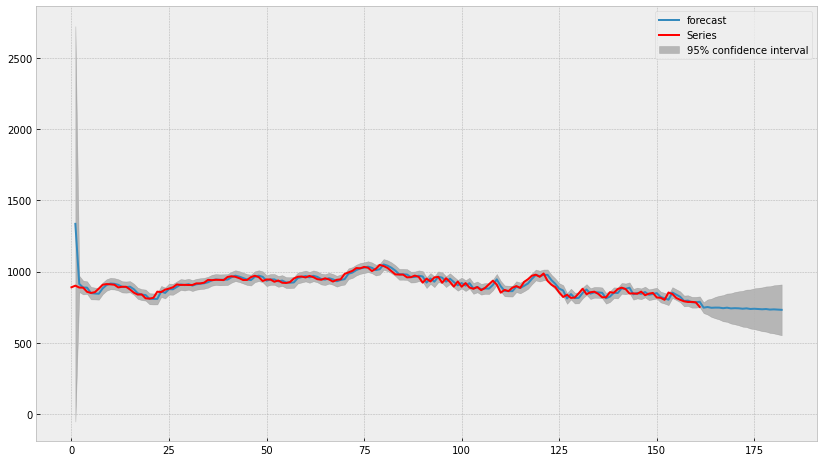

In [9]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    plot_predict(best_mdl, 1, len(new_series)+20, ax=ax)
    plt.plot(new_series, color='red', label='Series')
    plt.legend()
    plt.show()

In [ ]:
#new_series = new_series[12:] - new_series[:-12]
#new_series = new_series[1:] - new_series[:-1]

In [10]:
new_series = np.diff(new_series, 1)
new_series = np.diff(new_series, 12)

In [11]:
new_series

array([   2558.68,    2711.58,   -1897.88,   -4815.12,   12973.68,
        -16506.7 ,   12942.1 ,   -5327.44,   -2140.4 ,    9184.25,
        -17757.13,   27074.35,  -34534.71,   40335.87,  -46140.56,
         49674.93,  -45609.38,   32137.34,  -13473.08,   -3692.  ,
         14105.12,  -15799.78,   10440.85,   -2032.89,   -4969.85,
          6812.4 ,   -1893.65,   -7306.42,   14859.46,  -15534.15,
          8486.35,    2642.61,  -12126.34,   15410.02,  -12017.62,
          5696.84,   -1229.63,     895.54,   -3568.43,    7196.7 ,
        -11765.75,   17593.2 ,  -20785.24,   14943.85,     673.01,
        -18195.98,   28328.3 ,  -28600.06,   23497.06,  -18244.32,
         14769.78,  -13325.1 ,   14286.8 ,  -16385.18,   16385.73,
        -13214.11,    9739.56,   -7870.08,    4545.46,    4352.75,
        -17975.42,   30720.64,  -36653.57,   32437.01,  -18732.92,
           873.14,   13145.03,  -16992.6 ,    9899.81,    1775.98,
         -7916.28,    3306.22,    6873.67,  -12773.6 ,   10153

In [14]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 31.7 MB/s 


In [15]:
from arch import arch_model

In [16]:
p_ = 2
o_ = 2
q_ = 3

# Using student T distribution usually provides better fit
am = arch_model(new_series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                      Constant Mean - GJR-GARCH Model Results                       
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                        GJR-GARCH   Log-Likelihood:               -1706.24
Distribution:      Standardized Student's t   AIC:                           3432.49
Method:                  Maximum Likelihood   BIC:                           3462.53
                                              No. Observations:                  149
Date:                      Sun, Nov 20 2022   Df Residuals:                      148
Time:                              14:01:09   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
m

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.029e+09. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Results of Dickey-Fuller Test:
Test Statistic                -1.313284e+01
p-value                        1.482570e-24
#Lags Used                     1.400000e+01
Number of Observations Used    1.340000e+02
Critical Value (1%)           -3.480119e+00
Critical Value (5%)           -2.883362e+00
Critical Value (10%)          -2.578407e+00
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


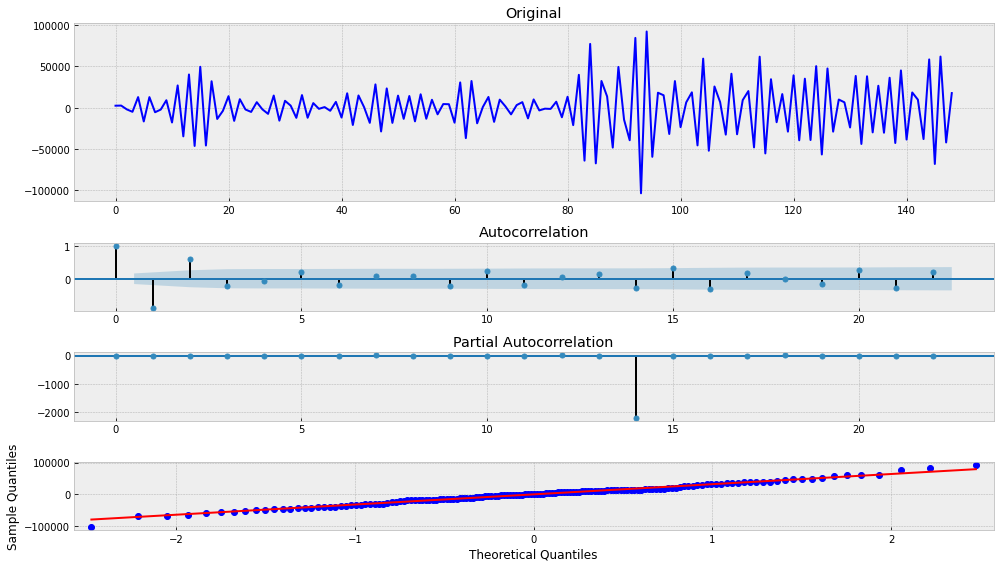

In [17]:
tsplot(res.resid)

**LSTM**

In [45]:
TRAIN_SPLIT = 120

In [46]:
#new_series = pd.read_csv("international-airline-passengers.csv")['Close']
df = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
uni_data = df['Close']
uni_data.index = df['Week']
uni_data.head()

Week
1971-W27    890.19
1971-W28    901.80
1971-W29    888.51
1971-W30    887.78
1971-W31    858.43
Name: Close, dtype: float64

In [47]:
uni_data = uni_data.values

In [48]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

In [49]:
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [50]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [52]:
univariate_past_history = 6
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [54]:
print ('history')
print (x_train_uni[0])
print ('predict')
print (y_train_uni[0])

history
[[-0.78416826]
 [-0.54910962]
 [-0.81818192]
 [-0.83296166]
 [-1.4271883 ]
 [-1.58551376]]
predict
-1.4759816971132562


In [55]:
def create_time_steps(length):
  return list(range(-length, 0))

In [56]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

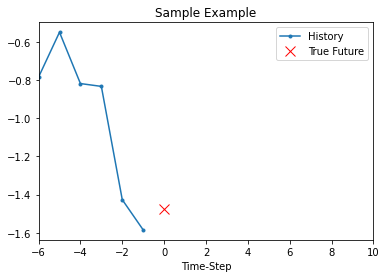

In [57]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')

In [58]:
BATCH_SIZE = 6
BUFFER_SIZE = 10

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [59]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [106]:
for x, y in val_univariate.take(1):
    
    print(simple_lstm_model.predict(x))

1/1 [==============================] - 0s 28ms/step
[[-1.3194   ]
 [-1.7418622]
 [-1.6640276]
 [-1.801029 ]
 [-1.7858526]
 [-1.4520291]]


In [61]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 4s 7ms/step - loss: 0.6601 - val_loss: 1.1360
Epoch 2/10
200/200 [==============================] - 1s 4ms/step - loss: 0.4545 - val_loss: 0.9001
Epoch 3/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3867 - val_loss: 0.7902
Epoch 4/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3546 - val_loss: 0.7444
Epoch 5/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3254 - val_loss: 0.6306
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3170 - val_loss: 0.5847
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3021 - val_loss: 0.5428
Epoch 8/10
200/200 [==============================] - 1s 4ms/step - loss: 0.3038 - val_loss: 0.5271
Epoch 9/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2951 - val_loss: 0.5214
Epoch 10/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2979 - val_loss: 0.5138

In [65]:
val_univariate.take(3)

<TakeDataset element_spec=(TensorSpec(shape=(None, 6, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

1/1 [==============================] - 0s 31ms/step


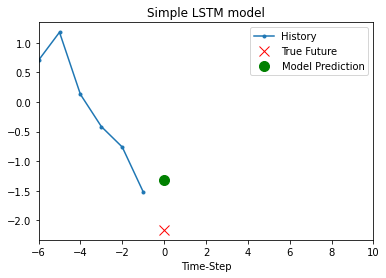

1/1 [==============================] - 0s 19ms/step


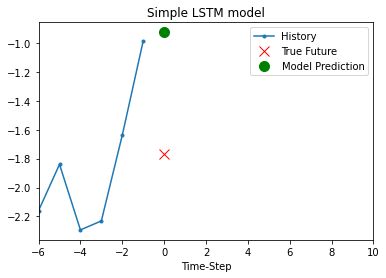

1/1 [==============================] - 0s 22ms/step


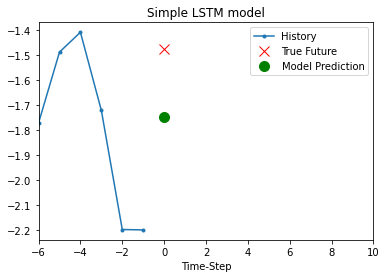

In [105]:
for x, y in val_univariate.take(3):
  
  plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
  plot.show()

In [97]:
ar = []
ar_2 = []
pred = []
pred_2 = []
for i in range(6, len(uni_data)):
  for j in range(0,6):
    ar.append(uni_data[i-6+j])
    ar_2.append(ar)
  pred.append(simple_lstm_model.predict(ar_2))
  ar.clear()
  ar_2.clear()

  

1/1 [==============================] - 0s 33ms/step


In [98]:
for i in range(0, len(pred)):
  pred_2.append(pred[i][0][0])

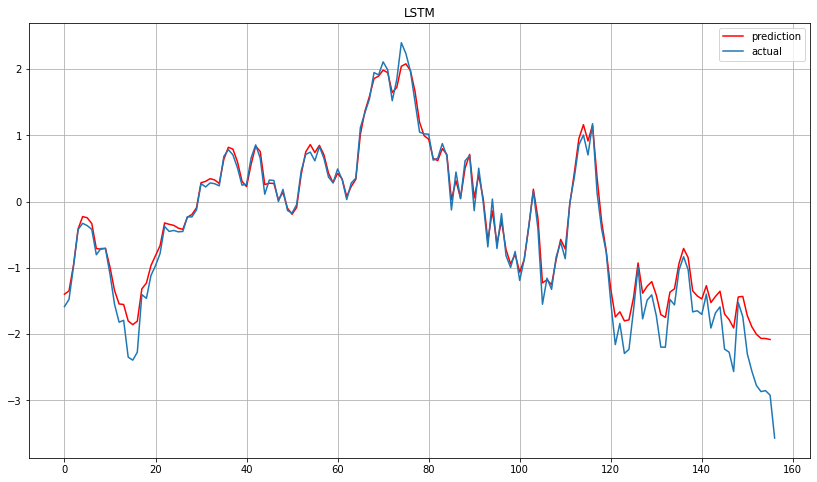

In [104]:
plt.figure(figsize=(14, 8))
plt.plot(pred_2, "r", label="prediction")
plt.plot(uni_data[5:], label="actual")
plt.legend(loc="best")
plt.title("LSTM")
plt.grid(True);